In [14]:
# Setup

import math
import numpy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List
from sklearn.datasets import fetch_openml

import libraries.autodiff as autodiff

In [15]:
# Load MNIST dataset

mnist = fetch_openml(name='mnist_784', version=1)

images, labels = mnist.data, mnist.target

IMAGE_DIM: int = 28
DIGITS = 10

WRONG_ANSWER_VAL = 0
RIGHT_ANSWER_VAL = 1

def get_output_for_digit(digit: int) -> np.ndarray:
    arr = [WRONG_ANSWER_VAL for i in range(0, DIGITS)]
    arr[digit] = RIGHT_ANSWER_VAL
    return np.array(arr)

def get_correct_digit(index: int) -> int:
    return int(labels[index])

def get_output_for_index(index: int) -> np.ndarray:
    return get_output_for_digit(get_correct_digit(index))

TOTAL_TRAINING_CASES = 70000
MAX_VAL = 256

datas = []
for i in range(0, TOTAL_TRAINING_CASES):
    datas.append((np.array([v / MAX_VAL for v in images.iloc[i].values]).reshape((IMAGE_DIM, IMAGE_DIM)), get_output_for_digit(get_correct_digit(i))))

In [16]:
TRAINING_CASES = 1000
VALIDATION_CASES = 10000
TRAINING_ITERATIONS = 10
BATCH_SIZE = 10

training_cases = datas[:TRAINING_CASES]
validation_cases = datas[-VALIDATION_CASES:]

def run_training(network: autodiff.NeuralNetwork, batch_size=BATCH_SIZE, verbose=True):
    correct_portion = []
    for j in range(0, TRAINING_ITERATIONS):
        random.shuffle(training_cases)
        for i in range(0, len(training_cases), batch_size):
            batch_in = [d[0].flatten() for d in training_cases[i:i+batch_size]]
            batch_out = [d[1] for d in training_cases[i:i+batch_size]]
            network.train_batch(batch_in, batch_out)
        if verbose:
            print(np.linalg.norm(network.get_parameters()))

        total_correct = 0
        for i in range(0, len(validation_cases)):
            image = validation_cases[i][0]

            result_raw = network.forwards(image)
            result = np.argmax(result_raw)
            
            if result == np.argmax(validation_cases[i][1]):
                total_correct += 1

        correct_portion.append(total_correct / len(validation_cases))
        if verbose:
            print(str(total_correct / len(validation_cases) * 100) + '% correct')

    return correct_portion

### Linear Model

In [17]:
LOSS_TYPE = autodiff.LossType.L2
OPTIMIZER = autodiff.SimpleOptimizer(0.01)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

l2_gd_correct_portion = run_training(network)

(10, 1) x 1
0.4115432893812656
75.67% correct
0.5304415807854537
80.01% correct
0.610291125015231
78.5% correct
0.668805267032378
81.12% correct
0.7193470706200142
80.46% correct
0.7667906355816788
80.15% correct
0.8075600372159415
81.01% correct
0.845375689544246
80.57% correct
0.8828373680753981
80.74% correct
0.9196315812015828
81.02000000000001% correct


In [18]:
LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.SimpleOptimizer(0.01)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

ce_gd_correct_portion = run_training(network)

(10, 1) x 1
0.884326633663577
75.32% correct
1.489792101585912
77.97% correct
1.9289764333640607
79.28% correct
2.2687121299413118
79.72% correct
2.5451940535413646
80.28% correct
2.7791580177853623
81.25% correct
2.982343190710439
81.51% correct
3.1639819187888136
82.11% correct
3.3268126296546985
82.63000000000001% correct
3.475922779349186
83.17999999999999% correct


In [19]:
LOSS_TYPE = autodiff.LossType.L2
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

l2_adam_correct_portion = run_training(network)

(10, 1) x 1
3.2076469557228284
67.39% correct
3.943525037049269
65.23% correct
5.036492773690965
54.22% correct
5.482283308346071
68.24% correct
5.877478168370942
62.419999999999995% correct
6.475710426180283
61.77% correct
6.937090370184324
62.32% correct
7.380073190881305
63.33% correct
7.817288759738063
57.879999999999995% correct
8.111426360456065
57.489999999999995% correct


In [20]:
LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

ce_adam_correct_portion = run_training(network)

(10, 1) x 1
10.060520859693737
83.57% correct
13.311516907090668
85.02% correct
16.21646121636059
79.27% correct
18.964979287396186
85.44% correct
21.558634323443993
85.15% correct
24.112322717117102
85.36% correct
26.69202328022708
85.55% correct
28.90964845027902
84.98% correct
30.74758590681524
85.04% correct
33.01031725971122
85.17% correct


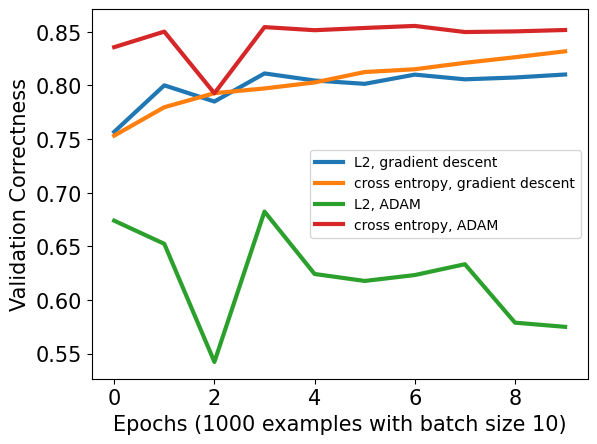

In [21]:
plt.plot(l2_gd_correct_portion, linewidth=3, label="L2, gradient descent")
plt.plot(ce_gd_correct_portion, linewidth=3, label="cross entropy, gradient descent")
plt.plot(l2_adam_correct_portion, linewidth=3, label="L2, ADAM")
plt.plot(ce_adam_correct_portion, linewidth=3, label="cross entropy, ADAM")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Epochs (1000 examples with batch size 10)', fontsize=15)
plt.ylabel('Validation Correctness', fontsize=15)
plt.legend()